In [1]:
# Autoreload src when changed
%load_ext autoreload
%autoreload 2

In [5]:
# Updates the catalog/context/session/pipelines variables if changed <-- run this if e.g. catalog or pipelines was edited since starting the notebook
%reload_kedro
catalog.list()

[03/19/23 13:56:30] INFO     Resolved project path as: /home/zhixingruan/Projects/popsign-meow.     ]8;id=280848;file:///home/zhixingruan/miniconda3/envs/popsign-meow/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=452955;file:///home/zhixingruan/miniconda3/envs/popsign-meow/lib/python3.10/site-packages/kedro/ipython/__init__.py#134\134]8;;\
                             To set a different path, run '%reload_kedro <project_root>'                           

[03/19/23 13:56:30] INFO     Kedro project popsign-meow                                             ]8;id=498601;file:///home/zhixingruan/miniconda3/envs/popsign-meow/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=271352;file:///home/zhixingruan/miniconda3/envs/popsign-meow/lib/python3.10/site-packages/kedro/ipython/__init__.py#103\103]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=841557;file:///home/zhixingruan/miniconda3/envs/popsign-meow/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=462377;file:///home/zhixingruan/miniconda3/envs/popsign-meow/lib/python3.10/site-packages/kedro/ipython/__init__.py#104\104]8;;\
                             'pipelines'                                                                           

['landmarks',
 'signs',
 'sign_to_prediction_index',
 'parameters',
 'params:competition',
 'params:dirs',
 'params:dirs.data-raw']

In [6]:
# Loads dictionary where each key is the <subject>/<sequenceid>.parquet file and the values is the corresponding pandas/parquet load function
landmarks_datasets = catalog.load('landmarks')

[03/19/23 13:56:31] INFO     Loading data from 'landmarks' (PartitionedDataSet)...              ]8;id=960494;file:///home/zhixingruan/miniconda3/envs/popsign-meow/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=430595;file:///home/zhixingruan/miniconda3/envs/popsign-meow/lib/python3.10/site-packages/kedro/io/data_catalog.py#343\343]8;;\

In [7]:
# Load function
print(landmarks_datasets['16069/100015657'])

# Calling the load function
landmarks_datasets['16069/100015657']()

<bound method AbstractVersionedDataSet.load of <kedro_datasets.pandas.parquet_dataset.ParquetDataSet object at 0x7fbb70892110>>


,frame,row_id,type,landmark_index,x,y,z
0,103,103-face-0,face,0,0.437886,0.437599,-0.051134
1,103,103-face-1,face,1,0.443258,0.392901,-0.067054
2,103,103-face-2,face,2,0.443997,0.409998,-0.042990
3,103,103-face-3,face,3,0.435256,0.362771,-0.039492
4,103,103-face-4,face,4,0.443780,0.381762,-0.068013
...,...,...,...,...,...,...,...
57010,207,207-right_hand-16,right_hand,16,NaN,NaN,NaN
57011,207,207-right_hand-17,right_hand,17,NaN,NaN,NaN
57012,207,207-right_hand-18,right_hand,18,NaN,NaN,NaN
57013,207,207-right_hand-19,right_hand,19,NaN,NaN,NaN


In [ ]:
num_landmarks = 543  # number of landmarks per frame
num_frames 

In [8]:
# Loads training data
signs = catalog.load('signs')

[03/19/23 13:58:04] INFO     Loading data from 'signs' (CSVDataSet)...                          ]8;id=971591;file:///home/zhixingruan/miniconda3/envs/popsign-meow/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=758730;file:///home/zhixingruan/miniconda3/envs/popsign-meow/lib/python3.10/site-packages/kedro/io/data_catalog.py#343\343]8;;\

In [9]:
signs

,path,participant_id,sequence_id,sign
0,train_landmark_files/26734/1000035562.parquet,26734,1000035562,blow
1,train_landmark_files/28656/1000106739.parquet,28656,1000106739,wait
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud
3,train_landmark_files/25571/1000210073.parquet,25571,1000210073,bird
4,train_landmark_files/62590/1000240708.parquet,62590,1000240708,owie
...,...,...,...,...
94472,train_landmark_files/53618/999786174.parquet,53618,999786174,white
94473,train_landmark_files/26734/999799849.parquet,26734,999799849,have
94474,train_landmark_files/25571/999833418.parquet,25571,999833418,flower
94475,train_landmark_files/29302/999895257.parquet,29302,999895257,room


In [60]:
landmark_test = landmarks_datasets['16069/100015657']()
landmark_test.drop(['z'], axis=1, inplace=True)

In [16]:
signs.loc[signs.path == 'train_landmark_files/16069/100015657.parquet']

,path,participant_id,sequence_id,sign
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud


In [17]:
landmark_test.type.value_counts()

face          49140
pose           3465
left_hand      2205
right_hand     2205
Name: type, dtype: int64

## Check hand data

In [61]:
test_hand = landmark_test.loc[landmark_test.type.isin(['left_hand', 'right_hand'])].copy()

In [62]:
test_hand.dropna(inplace=True)
test_hand

,frame,row_id,type,landmark_index,x,y
468,103,103-left_hand-0,left_hand,0,0.903850,0.686351
469,103,103-left_hand-1,left_hand,1,0.812678,0.626594
470,103,103-left_hand-2,left_hand,2,0.728513,0.588752
471,103,103-left_hand-3,left_hand,3,0.651862,0.586241
472,103,103-left_hand-4,left_hand,4,0.588590,0.591355
...,...,...,...,...,...,...
56956,207,207-left_hand-16,left_hand,16,0.831872,0.529663
56957,207,207-left_hand-17,left_hand,17,0.966463,0.458484
56958,207,207-left_hand-18,left_hand,18,0.917677,0.468401
56959,207,207-left_hand-19,left_hand,19,0.882650,0.505012


In [39]:
import matplotlib.pyplot as plt
import numpy as np

In [30]:
plot_test = test_hand.loc[test_hand.row_id.str.contains('103-left_hand')]

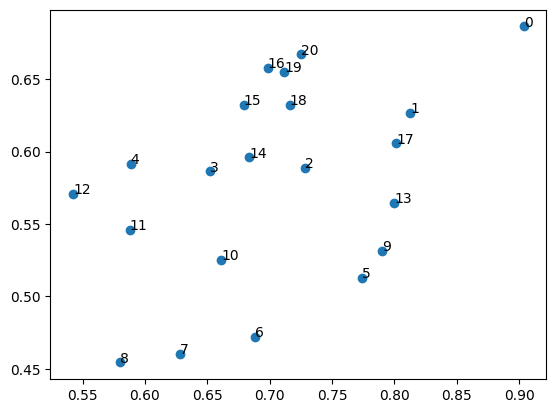

In [38]:
plt.scatter(plot_test.x, plot_test.y)
for i, txt in enumerate(plot_test.landmark_index):
    plt.annotate(txt, (plot_test.x.iloc[i], plot_test.y.iloc[i]))

In [37]:
landmark_test.loc[landmark_test.type == 'right_hand']

,frame,row_id,type,landmark_index,x,y,z
522,103,103-right_hand-0,right_hand,0,NaN,NaN,NaN
523,103,103-right_hand-1,right_hand,1,NaN,NaN,NaN
524,103,103-right_hand-2,right_hand,2,NaN,NaN,NaN
525,103,103-right_hand-3,right_hand,3,NaN,NaN,NaN
526,103,103-right_hand-4,right_hand,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...
57010,207,207-right_hand-16,right_hand,16,NaN,NaN,NaN
57011,207,207-right_hand-17,right_hand,17,NaN,NaN,NaN
57012,207,207-right_hand-18,right_hand,18,NaN,NaN,NaN
57013,207,207-right_hand-19,right_hand,19,NaN,NaN,NaN


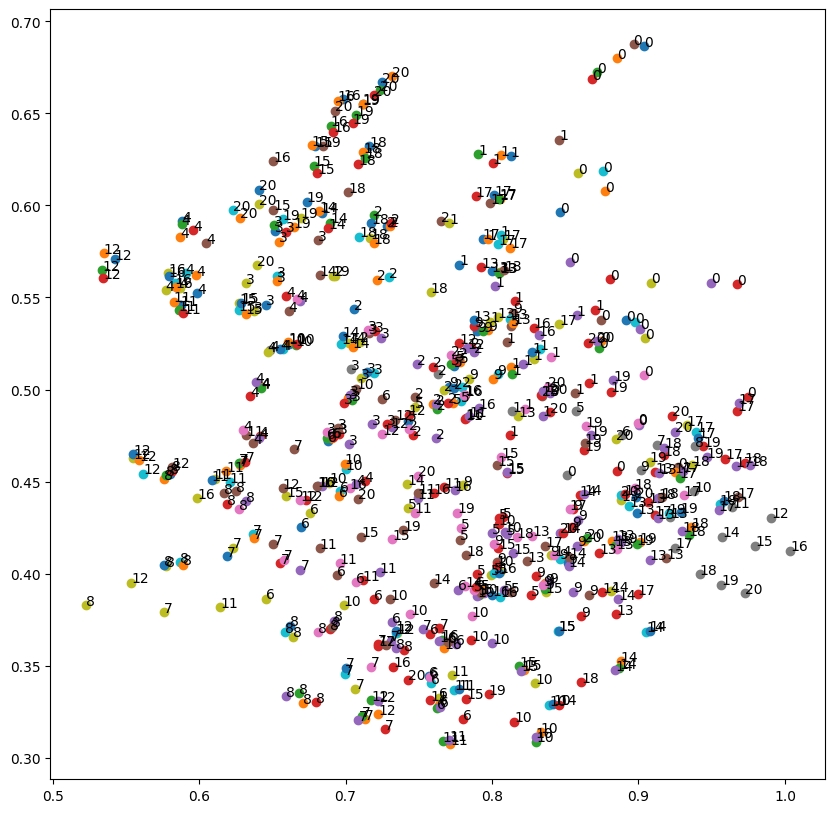

In [41]:
plt.figure(figsize=(10,10))
for frame_i in np.arange(103, 208):
    plot_frame = test_hand.loc[test_hand.frame == frame_i]
    plt.scatter(plot_frame.x, plot_frame.y)
    for i, txt in enumerate(plot_frame.landmark_index):
        plt.annotate(txt, (plot_frame.x.iloc[i], plot_frame.y.iloc[i]))

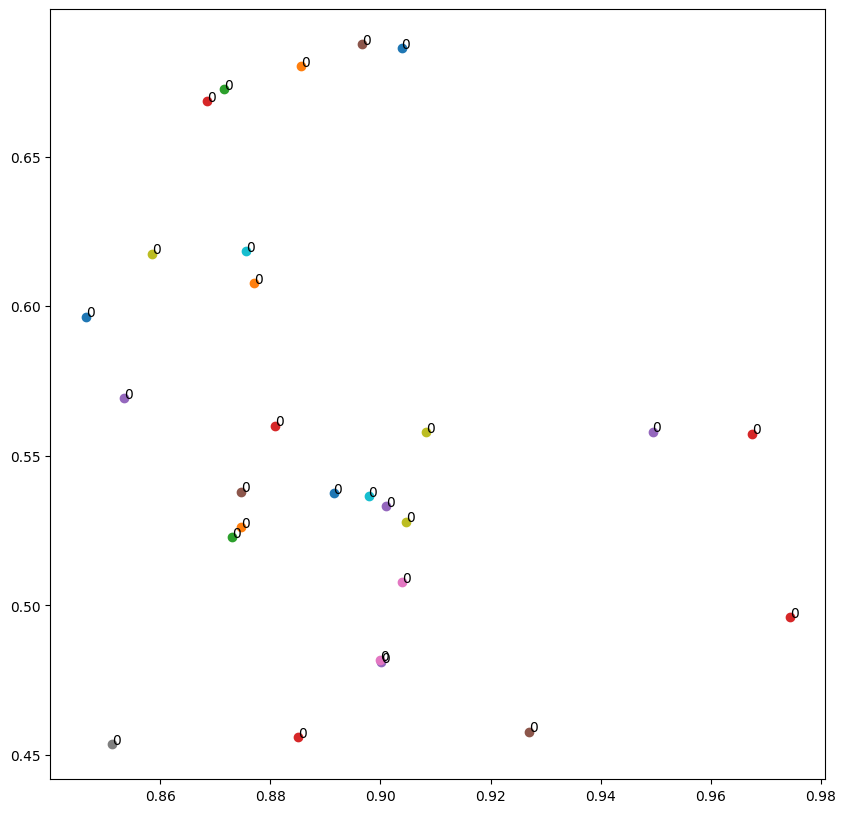

In [44]:
plt.figure(figsize=(10,10))
for frame_i in np.arange(103, 208):
    plot_frame = test_hand.loc[test_hand.frame == frame_i].loc[test_hand.landmark_index == 0]
    plt.scatter(plot_frame.x, plot_frame.y)
    for i, txt in enumerate(plot_frame.landmark_index):
        plt.annotate(txt, (plot_frame.x.iloc[i], plot_frame.y.iloc[i]))

In [48]:
len(test_hand.frame.value_counts())

28

## Check face data

In [63]:
test_face = landmark_test.loc[landmark_test.type == 'face'].copy()

In [69]:
test_face_plot = test_face.loc[test_face.frame == 103]

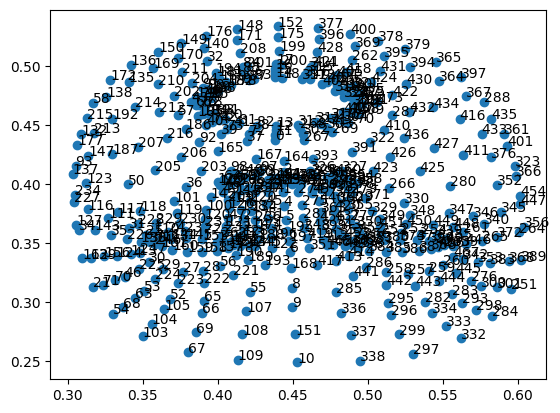

In [70]:
plt.scatter(test_face_plot.x, test_face_plot.y)
for i, txt in enumerate(test_face_plot.landmark_index):
    plt.annotate(txt, (test_face_plot.x.iloc[i], test_face_plot.y.iloc[i]))

In [73]:
lipsUpperOuter = [61, 185, 40, 39, 37, 0, 267, 269, 270, 409, 291]
lipsLowerOuter = [146, 91, 181, 84, 17, 314, 405, 321, 375, 291]
lipsUpperInner = [78, 191, 80, 81, 82, 13, 312, 311, 310, 415, 308]
lipsLowerInner = [78, 95, 88, 178, 87, 14, 317, 402, 318, 324, 308]

lips = lipsLowerInner + lipsUpperInner + lipsLowerOuter + lipsUpperOuter

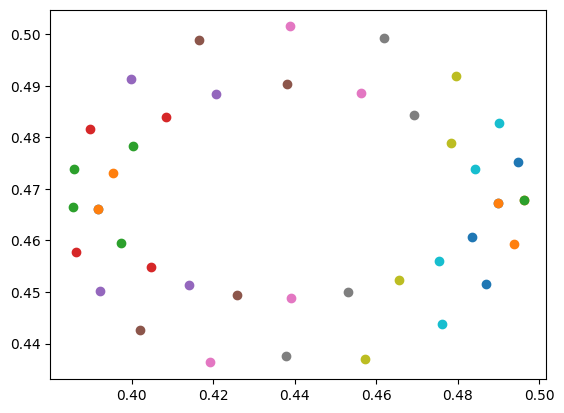

In [74]:
for lip in lips:
    plt.scatter(test_face_plot.loc[test_face_plot.landmark_index == lip].x, 
                test_face_plot.loc[test_face_plot.landmark_index == lip].y)

## Check pose data

In [65]:
test_pose = landmark_test.loc[landmark_test.type == 'pose'].copy()

In [67]:
test_pose_plot = test_pose.loc[test_pose.frame == 103]

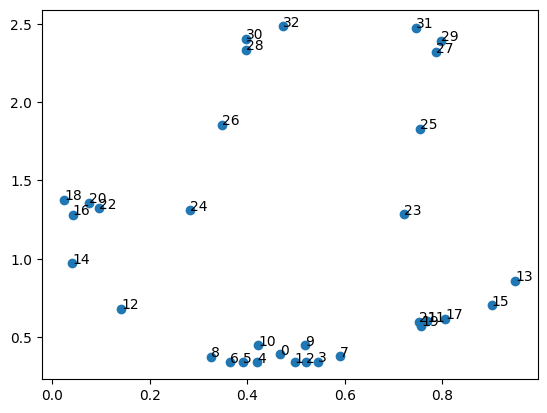

In [68]:
plt.scatter(test_pose_plot.x, test_pose_plot.y)
for i, txt in enumerate(test_pose_plot.landmark_index):
    plt.annotate(txt, (test_pose_plot.x.iloc[i], test_pose_plot.y.iloc[i]))